# Titanic Dataset

O conjunto de dados de teste conta com as seguintes variáveis: PassenderId: Passenger ID, Survived: Passnager Survival Indicator, Pclass: Passenger Class, Name: Name, Sex: Sex, Age: Age, SibSp: Number of Siblings/Spouses Aboard, Parch: Number of Parents/Children Aboard, Ticket: Ticket Number, Fare: Passenger Fare, Cabin: Cabin and Embarked: Port of Embarkation. 
Entretanto, vamos considerar as variáveis Survived, Pclass, Sex, Age, SibSp, Parch e Embarked.

## Carregando o pacote titanic

Vamos carregar o conjunto de dados por meio da biblioteca **titanic**.

In [2]:
#install.packages('titanic')
library('titanic')

In [13]:
#install.packages('knitr', dependencies = TRUE)
titanic_df <- subset(titanic_train, select = c('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked'))
#knitr::kable(head(titanic_df))
head(titanic_df)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,NA,0,0,8.4583,Q


O conjunto de dados de treino conta com 891 observações e o conjunto de teste com 418 observações.

In [14]:
dim(titanic_df)

[1] 891   8

In [15]:
str(titanic_df)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : chr  "male" "female" "female" "female" ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: chr  "S" "C" "S" "S" ...


In [16]:
na_sum <- apply(X = titanic_df, MARGIN = 2, FUN = function(x) sum(is.na(x)))
t(na_sum)              

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,177,0,0,0,0


Vamos remover as observações com valores faltantes e considerar apenas as demais observações.

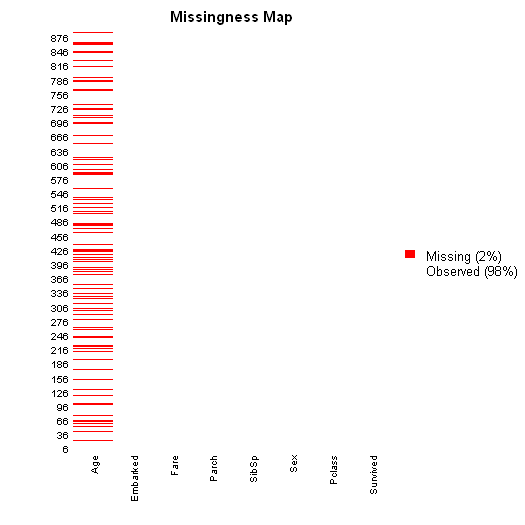

In [18]:
options(repr.plot.res = 75)
library(Amelia)
missmap(titanic_df, col=c('red', 'white'))

In [5]:
titanic_df <- na.omit(titanic_df)
head(titanic_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
7,0,1,male,54,0,0,51.8625,S


Agora, o conjunto de dados conta com 714 observações.

In [25]:
nrow(titanic_df)

[1] 714

### Vizualização dos dados

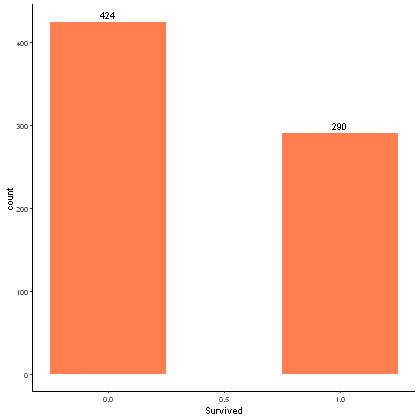

In [7]:
options(repr.plot.res = 60)
library(ggplot2)
ggplot(titanic_df, aes(x = Survived)) +
  geom_bar(width=0.5, fill = "coral") +
  geom_text(stat='count', aes(label=stat(count)), vjust=-0.5) +
  theme_classic()

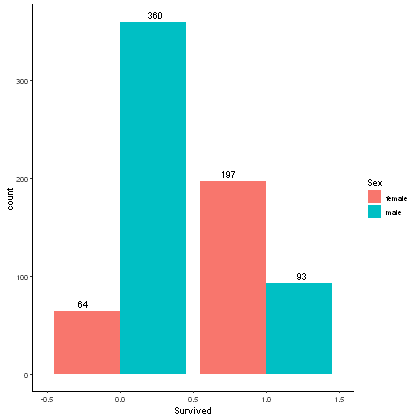

In [21]:
options(repr.plot.res = 60)
ggplot(titanic_df, aes(x = Survived, fill=Sex)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), vjust=-0.5)+
 theme_classic()

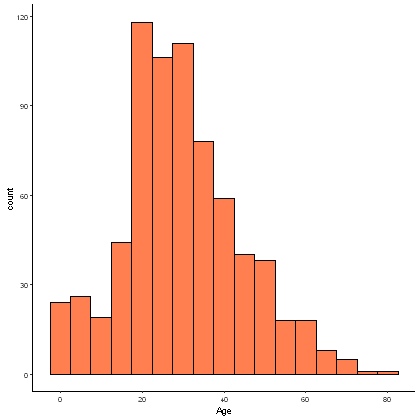

In [33]:
options(repr.plot.res = 60)
ggplot(titanic_df, aes(x = Age)) +
 geom_histogram(color="black", fill="coral", binwidth = 5) +
 theme_classic()

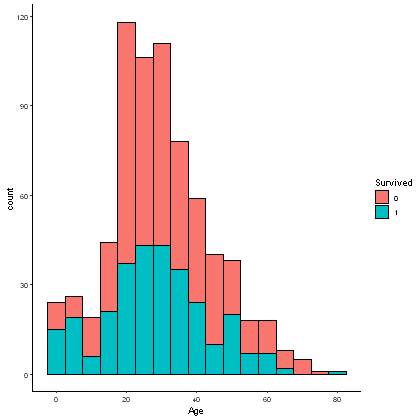

In [35]:
options(repr.plot.res = 60)
ggplot(titanic_df, aes(x = Age, fill = Survived)) +
 geom_histogram(color="black", binwidth = 5) +
 theme_classic()

In [19]:
titanic_df$Survived <- factor(titanic_df$Survived)
titanic_df$Pclass <- factor(titanic_df$Pclass, order=TRUE, levels = c(3, 2, 1))
titanic_df$SibSp <- factor(titanic_df$SibSp)
titanic_df$Parch <- factor(titanic_df$Parch)

### Diagrama de correlação

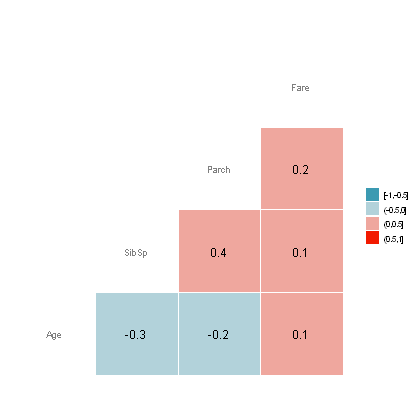

In [59]:
#install.packages('GGally')
library(GGally)

options(repr.plot.res = 60, warn = -1)
ggcorr(titanic_df,
       nbreaks = 4,
       label = TRUE,
       label_size = 5,
       color = 'grey50')

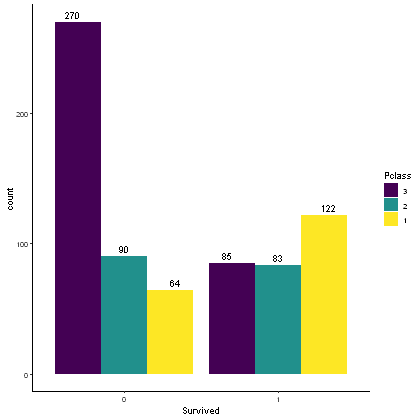

In [63]:
options(repr.plot.res = 60, warn = 0)
ggplot(titanic_df, aes(x = Survived, fill=Pclass)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

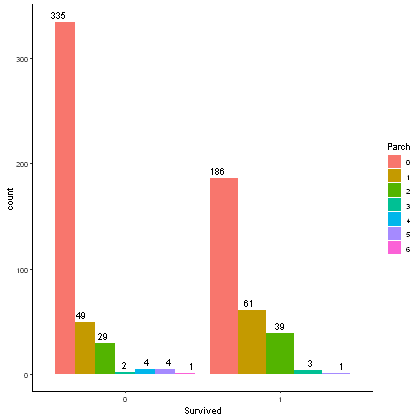

In [21]:
options(repr.plot.res = 60, warn = 0)
ggplot(titanic_df, aes(x = Survived, fill = Parch)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

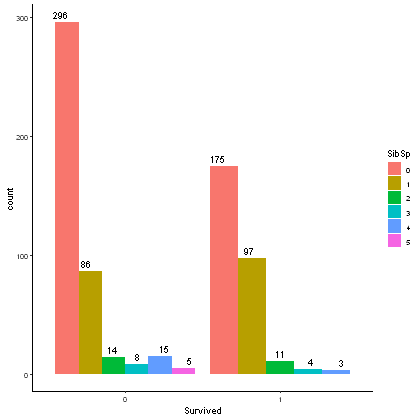

In [22]:
ggplot(titanic_df, aes(x = Survived, fill = SibSp)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

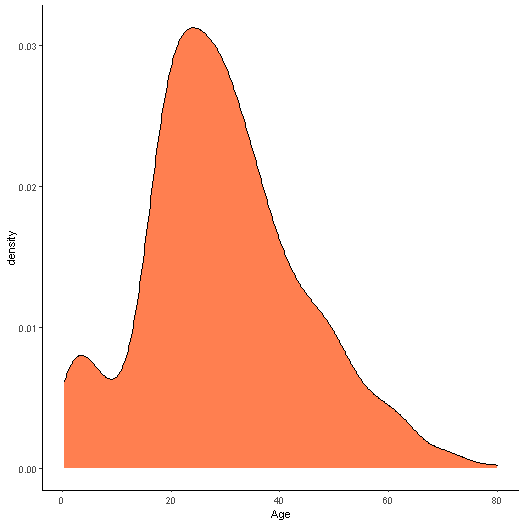

In [23]:
options(repr.plot.res = 75, warn = 0)
ggplot(titanic_df, aes(x = Age)) +
 geom_density(fill='coral') +
theme_classic()

## Separando o conjunto de dados de treinamento e teste

Vamos dividir o conjunto de dados considerando 75% para o treinamento e os 25% restantes para o teste.

In [23]:
n_train <- floor(nrow(titanic_df) * 0.7)
set.seed(27012022)
smp_obs <- sample(x = nrow(titanic_df), size = n_train, replace = F)
train <- titanic_df[smp_obs,]
test <- titanic_df[-smp_obs,]

In [36]:
nrow(train) # conjunto de treinamento


[1] 499

In [38]:
nrow(test) # conjunto de teste

[1] 215

### Árvores de decisão

In [21]:
#install.packages('rpart')
#install.packages('rpart.plot')
library(rpart) # carregando biblioteca
library(rpart.plot)

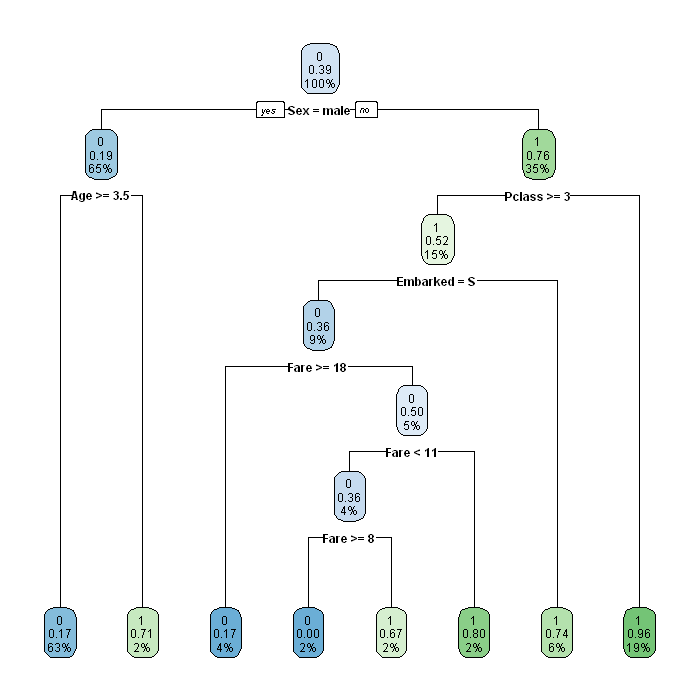

In [24]:
fit_tree <- rpart(Survived~., data = train, method = 'class')

options(repr.plot.res = 100, warn = 0)
rpart.plot(fit_tree, extra = 106)

In [19]:
library(caret) # carregando biblioteca

Loading required package: lattice


In [33]:
previsoes <- predict(object = fit_tree, newdata = test, type = 'class')
t(previsoes)

1 2 3 5 6 7 15 18 23 25 27 33 34 35 42 49 52 53 56 58 59 61 65 70 73 76 78
[1,] 0 1 1 0 0 0 1  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  0  0  0  0 
     82 85 86 87 91 92 94 105 108 109 110 111 115 117 125 133 149 151 153 154
[1,] 0  1  1  0  0  0  0  0   0   0   1   0   1   0   0   1   0   0   0   0  
     155 156 159 161 166 168 170 177 181 184 186 188 190 192 195 199 200 203
[1,] 0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   1   1   0  
     204 207 209 222 226 229 230 236 238 245 253 258 259 260 267 279 288 290
[1,] 0   0   1   0   0   0   0   1   1   0   0   1   1   1   0   0   0   1  
     293 294 298 300 301 309 313 317 318 323 325 327 329 330 334 335 337 338
[1,] 0   0   1   1   1   0   1   1   0   1   0   0   0   1   0   1   0   1  
     340 342 346 348 349 355 359 375 376 379 381 385 387 389 391 394 395 397
[1,] 0   1   1   1   1   0   1   0   1   0   1   0   1   0   0   1   1   1  
     401 402 403 406 409 411 414 423 425 432 441 446 457 461 463 466 467 470
[1,] 0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   1  
     471 474 478 484 487 492 497 501 503 505 507 508 509 510 512 515 517 521
[1,] 0   1   0   0   1   0   1   0   1   1   1   0   0   0   0   0   1   1  
     524 530 541 543 547 549 552 554 555 561 562 563 567 572 575 576 581 582
[1,] 1   0   1   0   1   0   0   0   1   0   0   0   0   1   0   0   1   1  
     586 587 588 589 590 596 598 599 600 601 605 607 609 616 619 620 622 635
[1,] 1   0   0   0   0   0   0   0   0   1   0   0   1   1   1   0   0   0  
     638 641 647 650 655 656 658 661 665 676 678 680 686 688 689 691 711 712
[1,] 0   0   0   1   1   0   1   0   0   0   0   0   0   0   0   0   1   0  
     713 714 716 718 722 725 732 737 738 739 748 749 750 751 753 755 758 768
[1,] 0   0   0   1   0   0   0   0   0   0   1   0   0   1   0   1   0   1  
     770 775 778 779 785 790 791 792 798 800 802 806 808 809 814 815 817 820
[1,] 0   1   1   0   0   0   0   0   0   0   1   0   1   0   0   0   1   0  
     828 829 833 834 837 839 840 844 845 849 852 853 856 860 862 869 870 876
[1,] 1   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   1  
     878 883 886 887 890
[1,] 0   0   1   0   0  
Levels: 0 1

In [38]:
confusionMatrix(data = factor(test$Survived), reference = previsoes, positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 149  18
         1  34  67
                                          
               Accuracy : 0.806           
                 95% CI : (0.7535, 0.8516)
    No Information Rate : 0.6828          
    P-Value [Acc > NIR] : 4.352e-06       
                                          
                  Kappa : 0.5735          
                                          
 Mcnemar's Test P-Value : 0.03751         
                                          
            Sensitivity : 0.7882          
            Specificity : 0.8142          
         Pos Pred Value : 0.6634          
         Neg Pred Value : 0.8922          
             Prevalence : 0.3172          
         Detection Rate : 0.2500          
   Detection Prevalence : 0.3769          
      Balanced Accuracy : 0.8012          
                                          
       'Positive' Class : 1               
                              